# Activation Function 



Activation functions are a cornerstone of Machine Learning. In general, Activation Functions define how a processing unit will treat its input -- usually passing this input through it and generating an output through its result. To begin the process of having a more intuitive understanding, let's go through some of the most commonly used functions

In [1]:
## import the requried libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
def plot_act(i=1.0, actfunc=lambda x: x):
    ws = np.arange(-0.5, 0.5, 0.05)
    bs = np.arange(-0.5, 0.5, 0.05)

    X, Y = np.meshgrid(ws, bs)

    os = np.array([actfunc(tf.constant(w*i + b)).eval(session=sess) \
                   for w,b in zip(np.ravel(X), np.ravel(Y))])

    Z = os.reshape(X.shape)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1)

In [7]:
## creating the session 
sess = tf.Session();

## create a simple input of real values
i = tf.constant([1.0,2.0,3.0], shape = [1, 3])
## create a martix weights 
w = tf.random_normal(shape = [3,3])
## create a simple biases 
b = tf.random_normal(shape = [1,3])

## dummy activation function 
def function(x): return x
#tf.matmul will multiply the input(i) tensor and the weight(w) tensor then sum the result with the bias(b) tensor.
act = function( tf.matmul(i, w) + b)
## now evaluate the tensor to a numpy array
act.eval(session = sess)

array([[ 0.19906342,  1.7452457 , -2.80524707]], dtype=float32)

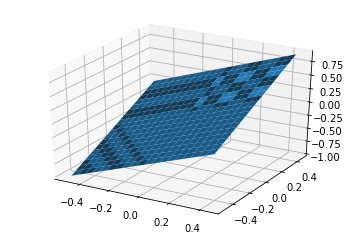

In [8]:
plot_act(1.0, function)

# The Step Function

The Step function was the first one designed for Machine Learning algorithms. It consists of a simple threshold function that varies the Y value from 0 to 1. This function has been historically utilized for classification problems, like Logistic Regression with two classes.

Activation binary step

The Step Function simply functions as a limiter. Every input that goes through this function will be applied to gets either assigned a value of 0 or 1. As such, it is easy to see how it can be handy in classification problems.

There are other variations of the Step Function such as the Rectangle Step and others, but those are seldom used.

Tensorflow dosen't have a Step Function.

# The Sigmoid Function

The next in line for Machine Learning problems is the family of the ever-present Sigmoid functions. Sigmoid functions are called that due to their shape in the Cartesian plane, which resembles an "S" shape.

Sigmoid functions are very useful in the sense that they "squash" their given inputs into a bounded interval. This is exceptionally handy when combining these functions with others such as the Step function.

Most of the Sigmoid functions you should find in applications will be the Logistic, Arctangent, and Hyperbolic Tangent functions.

Logistic Regression
The Logistic function, as its name implies, is widely used in Logistic Regression. It is defined as  f(x)=1/1+e−x . Effectively, this makes it so you have a Sigmoid over the  (0,1)  interval, like so:

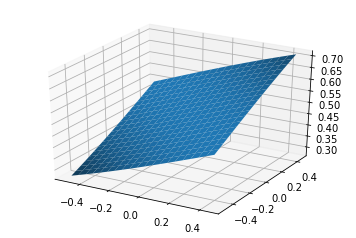

In [11]:
plot_act(1, tf.sigmoid)

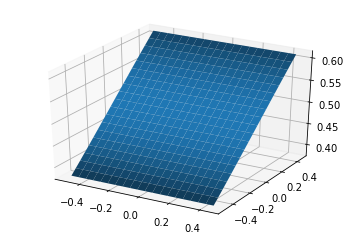

In [12]:
plot_act(0, tf.sigmoid)

# using sigmoid in a nueral networks

In [14]:
act - tf.sigmoid(tf.matmul(i, w) +b)
act.eval(session=sess)

array([[-3.10212207, -2.6831696 ,  2.8961587 ]], dtype=float32)

The Arctangent and Hyperbolic Tangent functions on the other hand, as the name implies, are based on the Tangent function. Arctangent is defined by  f(x)=tan−1x , and produces a sigmoid over the  (−π/2,π/2) interval.

# Tanh

The Hyperbolic Tangent, or TanH as it's usually called, is defined as  f(x)=(2/1+e^-2x)−1 . It produces a sigmoid over the  (−1,1)  interval. TanH is widely used in a wide range of applications, and is probably the most used function of the Sigmoid family.

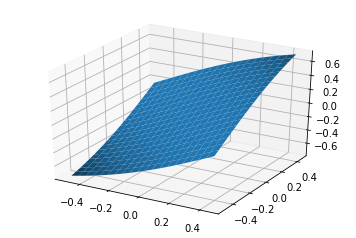

In [15]:
plot_act(1, tf.tanh)

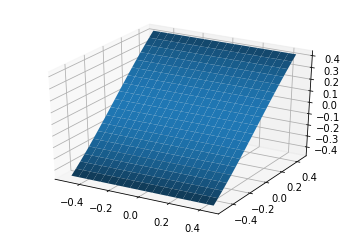

In [16]:
plot_act(0, tf.tanh)

In [17]:
act = tf.tanh(tf.matmul(i, w) + b)
act.eval(session=sess)

array([[ 0.99999589,  0.99947917,  0.99997038]], dtype=float32)

# The Linear Unit Function(RELU)

Linear Units are the next step in activation functions. They take concepts from both Step and Sigmoid functions and behave within the best of the two types of functions. Linear Units in general tend to be variation of what is called the Rectified Linear Unit, or ReLU for short.

The ReLU is a simple function which operates within the  [0,∞) interval. For the entirety of the negative value domain, it returns a value of 0, while on the positive value domain, it returns  x  for any  f(x).

While it may seem counterintuitive to utilize a pseudo-linear function instead of something like Sigmoids, ReLUs provide some benefits which might not be understood at first glance. For example, during the initialization process of a Neural Network model, in which weights are distributed at random for each unit, ReLUs will only activate approximately only in 50% of the times -- which saves some processing power. Additionally, the ReLU structure takes care of what is called the Vanishing and Exploding Gradient problem by itself. Another benefit -- if not only marginally relevant to us -- is that this kind of activation function is directly relatable to the nervous system analogy of Neural Networks (this is called Biological Plausibility).

The ReLU structure has also has many variations optimized for certain applications, but those are implemented on a case-by-case basis and therefore aren't in the scope of this notebook. If you want to know more, search for Parametric Rectified Linear Units or maybe Exponential Linear Units.

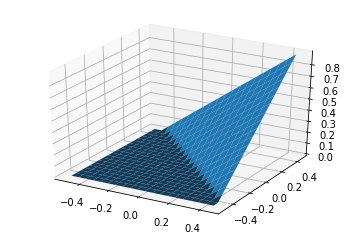

In [18]:
plot_act(1, tf.nn.relu)

In [19]:
act = tf.nn.relu(tf.matmul(i, w) + b)
act.eval(session=sess)

array([[ 0.        ,  7.23061562,  0.        ]], dtype=float32)